In [11]:
#Setup some notebook plot parameters
library(repr)
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.pointsize = 8)

## Lesson 1

Why do we need reproducable research?

* New technologies increasing data collection throughput; data are more complex and extremely high dimesional
* Existing databases can be merged into new "megadatabases"
* Computing power is greatly increased, allowing more sophisticated analyses
* For every field "X" ther is a field "Computational X"

**Golden Rule of Reproducibility: Script everything!**

#### Structure of a Data Analysis

Steps of a Data Analysis

* Define the question
* Define the ideal data set
* Determine what data you can access
* Obtain the data
* Clean the data
* Exploratory data analysis
* Statistical prediction/modeling
* Interpret results
* Challenge results
* Synthesize/write up results
* Create reproducible code

##### Defining a Question

* Most powerful dimension reduction tool for an analysis

##### Define the ideal data set

* the data set may depend on your goal
    - Descriptive - a whole population
    - Exploratory - a random sample with many variables measured
    - Inferential - the right population, randomly sampled
    - Predictive - a training and test data set from the same population
    - Causal - data from a randomized study
    - Mechanistic - data about all components of the system

##### Determine what data you can access

* Sometimes you can find data on the web
* Other times you may need to buy the data
* Be sure to respect terms of use
* If the data don't exist, you need to generate it yourself

##### Obtain the data

* Try to obtain the raw data
* Be sure to reference the source
* If you get the data from an internet source, record the url and time accessed

##### Clean the data

* Raw data often needs to be processed
* If it is alread pre-processed, make sure you understand how
* Understand the source of the data (census, sample, convenience sample)
* Determine if the data is good enough to solve your problem

In [1]:
library(kernlab)
data(spam)
str(spam[,1:5])

Warning message:
"package 'kernlab' was built under R version 3.3.2"

'data.frame':	4601 obs. of  5 variables:
 $ make   : num  0 0.21 0.06 0 0 0 0 0 0.15 0.06 ...
 $ address: num  0.64 0.28 0 0 0 0 0 0 0 0.12 ...
 $ all    : num  0.64 0.5 0.71 0 0 0 0 0 0.46 0.77 ...
 $ num3d  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ our    : num  0.32 0.14 1.23 0.63 0.63 1.85 1.92 1.88 0.61 0.19 ...


In [3]:
#Split the data into a training and test set
set.seed(3435)
trainIndicator = rbinom(4601, size = 1, prob = 0.5)
table(trainIndicator)

trainIndicator
   0    1 
2314 2287 

In [18]:
trainSpam = spam[trainIndicator == 1,]
testSpam = spam[trainIndicator == 0,]

##### Exporatory Analysis

* Look at the summaries of data
* check for missing data
* create exploratory plots

In [5]:
names(trainSpam)

[1] "make"              "address"           "all"              
 [4] "num3d"             "our"               "over"             
 [7] "remove"            "internet"          "order"            
[10] "mail"              "receive"           "will"             
[13] "people"            "report"            "addresses"        
[16] "free"              "business"          "email"            
[19] "you"               "credit"            "your"             
[22] "font"              "num000"            "money"            
[25] "hp"                "hpl"               "george"           
[28] "num650"            "lab"               "labs"             
[31] "telnet"            "num857"            "data"             
[34] "num415"            "num85"             "technology"       
[37] "num1999"           "parts"             "pm"               
[40] "direct"            "cs"                "meeting"          
[43] "original"          "project"           "re"               
[46] "edu"               "table"             "conference"       
[49] "charSemicolon"     "charRoundbracket"  "charSquarebracket"
[52] "charExclamation"   "charDollar"        "charHash"         
[55] "capitalAve"        "capitalLong"       "capitalTotal"     
[58] "type"

In [6]:
head(trainSpam)

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
1,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,spam
7,0,0,0,0,1.92,0,0,0,0,0.64,...,0,0.054,0,0.164,0.054,0,1.671,4,112,spam
9,0.15,0,0.46,0,0.61,0,0.3,0,0.92,0.76,...,0,0.271,0,0.181,0.203,0.022,9.744,445,1257,spam
12,0,0,0.25,0,0.38,0.25,0.25,0,0,0,...,0.022,0.044,0,0.663,0,0,1.243,11,184,spam
14,0,0,0,0,0.9,0,0.9,0,0,0.9,...,0,0,0,0,0,0,2.083,7,25,spam
16,0,0.42,0.42,0,1.27,0,0.42,0,0,1.27,...,0,0.063,0,0.572,0.063,0,5.659,55,249,spam


In [7]:
table(trainSpam$type)


nonspam    spam 
   1381     906 

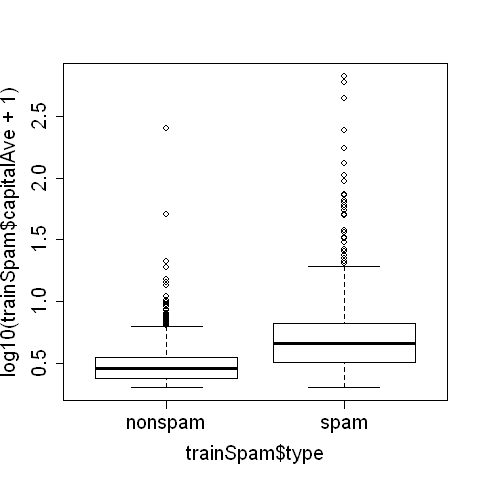

In [12]:
plot(log10(trainSpam$capitalAve+1) ~trainSpam$type)

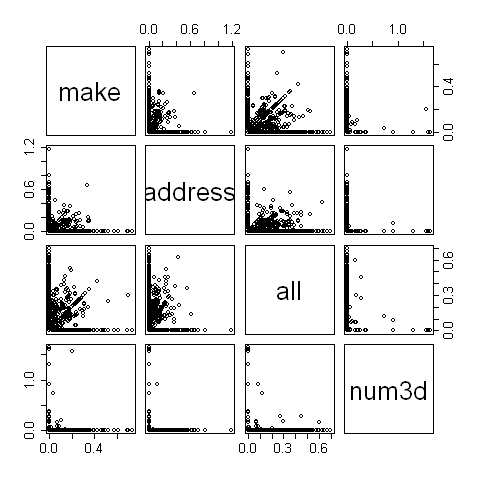

In [13]:
plot(log10(trainSpam[ , 1:4] +1))

##### Statistical prediction / modeling

* Should be informed by the results of your exploratory analysis
* Exact methods depends on the question of interest

In [20]:
trainSpam$numType = as.numeric(trainSpam$type) - 1
costFunction = function(x,y) sum(x != (y >0.5))
cvError = rep(NA, 55)
library(boot)
for (i in 1:55) {
    lmFormula = reformulate(names(trainSpam)[i], response = "numType")
    glmFit = glm(lmFormula, family = "binomial", data = trainSpam)
    cvError[i] = cv.glm(trainSpam, glmFit, costFunction, 2)$delta[2]
}    
    
names(trainSpam)[which.min(cvError)]

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

[1] "charDollar"

In [21]:
## Use the best model from the group
predictionModel = glm(numType ~ charDollar, family = "binomial", data = trainSpam)

## Get predictions on the test set
predictionTest = predict(predictionModel, testSpam)
predictedSpam = rep("nonspam", dim(testSpam)[1])

## Classify as 'spam' for those with prob > 0.5
predictedSpam[predictionModel$fitted > 0.5] = "spam"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [22]:
## Classification table
table(predictedSpam, testSpam$type)

             
predictedSpam nonspam spam
      nonspam    1346  458
      spam         61  449

##### Interpret results

* Use the appropriate language
    - describes
    - correlates with/ associated with
    - leads to / causes
    - predicts
* Give an explination
* interpret coefficients

##### Challenge results

* Challenge all steps
    - Questino
    - Data source
    - Processing
    - Analysis
    - Conclusions
* Challenge measures of uncertainty
* Think of potential alternative analyses

### Organizing a Data Analysis

Data Analysis Files
* Data
* Figures
* R Code
* Text